 Simple Linear Regression


1. Read the dataset
2. EDA,FE
3. Divide our dataset into independent and dependent features
4. Further divide the dataset into train and test
5. Standard Scaling
6. Model Training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

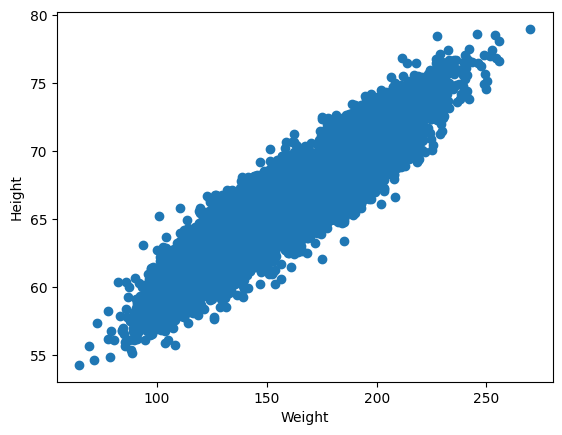

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Divide our dataset into independent and dependent features

In [7]:
X=df[['Weight']]  ##independent feature
y=df['Height'] ##dependent feature

In [8]:
X.shape,y.shape

((10000, 1), (10000,))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
X_train.shape,X_test.shape

((7000, 1), (3000, 1))

In [12]:
y_train.shape,y_test.shape

((7000,), (3000,))

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)

In [18]:
X_test=scaler.transform(X_test)

In [19]:
X_test

array([[ 0.377174  ],
       [ 1.06572153],
       [ 0.28665242],
       ...,
       [ 0.64448627],
       [-0.70764196],
       [ 0.96924294]])

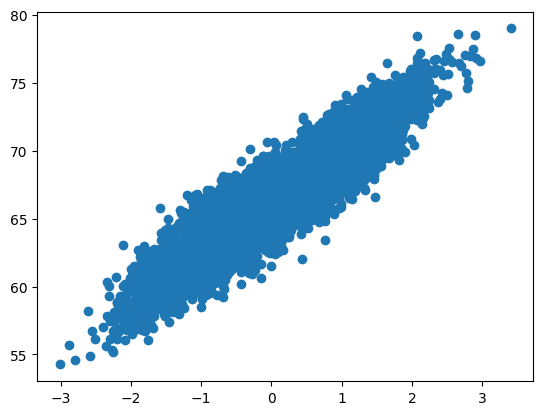

In [23]:
plt.scatter(X_train,y_train)

Model Training

In [24]:
scaler.transform([[80]])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.53101773]])

In [25]:
##Model Training

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
regressor

LinearRegression()

In [29]:
## Training the trained data

regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
regressor.intercept_

66.32026277291251

In [31]:
regressor.coef_

array([3.55313486])

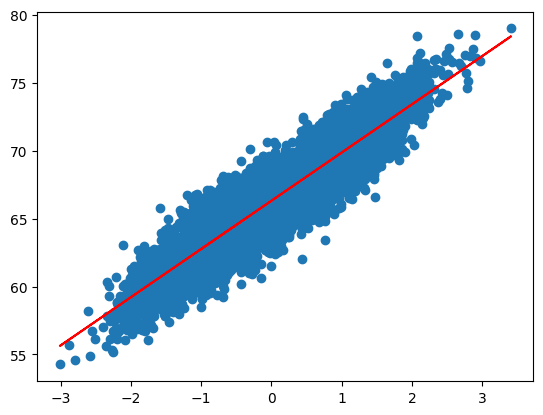

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

**prediction of train data**

1. predicted height output=intercept+coef_(Weights)
2. y_pred_train=66.3 + 3.55(X_train)

**predictionn of test data**

1. predicted height output=intercept + coef_(Weights)
2. y_pred_test =66.3 + 3.55(X_train)

In [37]:
## Prediction for test data

y_pred_test=regressor.predict(X_test)

In [38]:
y_pred_test

array([67.66041286, 70.10691508, 67.33877747, ..., 68.6102094 ,
       63.80591546, 69.76411367])

In [39]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
8014    62.715618
1074    70.123761
3063    69.883451
6487    62.266592
4705    71.528424
Name: Height, Length: 3000, dtype: float64

## Performance Metrics MAE, MSE, RMSE, 

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.1085956151270167
1.160079582904049
1.4521004149600043


**Accuracy of the model R squared and Adjusted r squared**

Formula

**R^2=1-SSR/SST**

- R^2 = accuracy of the model
- SSR = sum of squares of residuals
- SST = total sum of squares

In [42]:
from sklearn.metrics import r2_score

In [43]:
score=r2_score(y_test,y_pred_test)

In [44]:
score

0.8577922082576351

**Adjusted R square**

Adjusted R2= 1- [(1-R2)*(n-1)/(n-k-1)]

where:
- R2= The R2 of the model
- n=The number of observations
- k= THe number of predictor variables

In [46]:
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8577447740375743

In [47]:
scaler

StandardScaler()

In [48]:
regressor

LinearRegression()

In [49]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
